In [130]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap

# We will pick 5 values centered from [0,1] and 5 values centered from [1,0].
# these will be centers of gaussian values of two classes of data.
N=10
x1,y1 = np.random.multivariate_normal(mean=[0,1], cov = [[0.1, 0], [0, 0.1]], size=N).T
x2,y2 = np.random.multivariate_normal(mean=[1,0], cov = [[0.1, 0], [0, 0.1]], size=N).T

# generate_data will generate data for you.  It will return two matrices, 
#  one for class 0 and another for class 1.  It will also return two vectors: one 
#  for each of the labels.
def generate_data(N):
  x_0 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x2,y2)]).reshape(-1, 2)
  x_1 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x1,y1)]).reshape(-1, 2)
  return x_0, x_1, [0]*x_0.shape[0], [1]*x_1.shape[0]

N = 100
a0,a1,b0,b1 = generate_data(N)
print(a0.shape)
print(a1.shape)






(1000, 2)
(1000, 2)


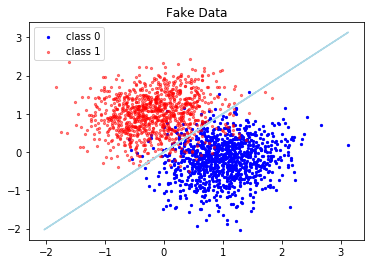

In [131]:
# lets plot the data
plt.title('Fake Data')
#plot the generated data
plt.scatter(a0[:,0], a0[:,1], alpha=1, color='b', s=5, label = 'class 0')
plt.scatter(a1[:,0], a1[:,1], alpha=0.5, color='r', s=5, label = 'class 1')
plt.legend()
# plot the "ideal" decision boundary (corresponding to the generation method)
plt.plot(a0, a0, c='lightblue')


(2000, 2)
(2000,)


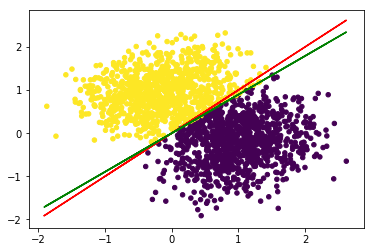

MSE:  2.0


In [151]:
# create a Linear classifier here (Pocket algorithm)
#import numpy as np
import matplotlib.pyplot
from matplotlib.colors import ListedColormap

x_train = np.concatenate((a0, a1), axis = 0)
y_train = np.concatenate((b0, b1), axis = 0)

print(x_train.shape)
print(y_train.shape)

y_pla = y_train.copy();
y_pla[y_pla == 0] = -1

def E_in(w,x,y):
    return np.sum(np.abs(np.sign(np.sum(np.multiply(x,w), axis=1)) - y_pla))
    #return np.sign(np.sum(np.multiply(x,w), axis=1)) - y_pla

def select_x_y(w,x,y):
    a = np.sign(np.sum(np.multiply(x,w), axis = 1)) - y_pla
    
    ind = np.where(a != 0)[0][[0]]
    return x[ind], y[ind]


def perceptron_learning_step(w,x,y):
    if (E_in(w,x,y) > 0):
        x_e, y_e = select_x_y(w,x,y)
        #w = w + x_e
        w = w + x_e * y_e
    return w

def pocket(x, y, N):
    w = np.matrix([1,1])
    w_t = np.random.uniform(0.0, 1.0, 2)
    for t in range(N):
        w_t = perceptron_learning_step(w_t, x, y)
        if (E_in(w_t, x, y) < E_in(w,x,y)):
            w = w_t
            
    return w


#get vector (learned linear classifier)
w = pocket(x_train, y_pla, 1000)


def g_func(w,x,y,i):
    result = np.sign(np.dot(w,x[i]))
    y[i] = result
    
decisionBound = lambda x_i: -(w[0,0]*x_i)/w[0,1]
N = 100
a0,a1,b0,b1 = generate_data(N)

g_pla = lambda x, w: np.sign(np.sum(np.multiply(w,x)))

x_test = np.concatenate((a0, a1), axis = 0)
y_test = np.empty(2000, dtype = np.int8)

for i in range(len(x_test)):
    g_func(w, x_test, y_test, i)
                     
plt.plot(a0,a0, c='red')
plt.scatter(np.squeeze(np.asarray(x_test[:,0])), np.squeeze(np.asarray(x_test[:,1])), c= y_test, s=20)
plt.plot(x_test, decisionBound(x_test), c = 'g')
plt.show()
                     
def mse(w, g, x, y):
    
    return (1/(x.shape[0]))*(np.sum((g(x,w)-y)**2))                   

print("MSE: ", mse(w,g_pla, x_train, y_pla))

In [152]:
# create a KNN classifier here

def euclidean(a, b):
    d = a-b
    return np.sqrt(d.dot(d))

def distance_array(pt, x):
    return np.apply_along_axis(lambda z: euclidean(pt, z), 1, x)

def knn(k, pt, x, y):
    idxs = np.argsort(distance_array(pt, x))
    y_ones = sum(y[idxs][:k])
    if y_ones > k - y_ones:
        return 1
    return 0

def knn_predict(k, pts, x, y):
    return np.apply_along_axis(lambda p: knn(k, p, x, y), 1, pts)

#print(knn(3, np.array([0,1]), x_train, y_train))
#print(knn(3, np.array([1,0]), x_train, y_train))
#print(knn(3, np.array([0,0]), x_train, y_train))
#print(knn_predict(3, np.array([[0,0],[0,1],[1,0]]), x_train, y_train))

(65, 60)
(65, 60)
(3900, 2)


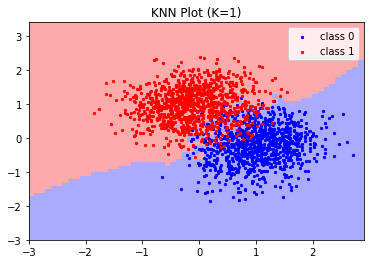

MSE:  2.5


In [154]:
#plot knn

a0, a1, b0, b1 = generate_data(N)
x_train = np.concatenate((a0,a1), axis=0)
y_train = np.concatenate((b0,b1), axis=0)



k= 1
x_min,x_max = -3,3
y_min,y_max = -3,3.5

h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(xx.shape)
print(yy.shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

Z = knn_predict(k, np.c_[xx.ravel(), yy.ravel()], x_train, y_train)
Z = Z.reshape(xx.shape)



cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(a0[:,0], a0[:,1], alpha=1, color='b', s=5, label= 'class 0')
plt.scatter(a1[:,0], a1[:,1], alpha=1, color='r', s=5, label= 'class 1')
plt.legend()
plt.title("KNN Plot (K=1)".format(k))
plt.show()

#def knn_pred(x,k):
 #   k= 3
  #  g_knn = lambda x: knn_pred(x,k)

#g_knn = knn_pred(g(x,y),k)

g_knn =lambda x, w: np.sign(np.sum(np.multiply(w,x)))
def mse(w, g, x, y):
    
    return (1/(x.shape[0]))*(np.sum((g(x,w)-y)**2))                   

print("MSE: " , mse(w,g_knn, x_train, y_train))